In [7]:
import tensorflow as tf

In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-12-17 13:23:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.251, 172.217.164.27, 172.217.0.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   116MB/s    in 0.9s    

2024-12-17 13:23:08 (116 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [9]:
import zipfile
zip_ref= zipfile.ZipFile("pizza_steak.zip","r")

zip_ref.extractall()
zip_ref.close()

In [10]:
!ls -a /content/pizza_steak


.  ..  test  train


In [11]:
import os
import pathlib
import numpy as np

In [12]:
for file_path ,folders ,images  in os.walk("pizza_steak"):
  print(f"File path: {file_path} , folders: {folders} , Images: {len(images)}")

File path: pizza_steak , folders: ['train', 'test'] , Images: 0
File path: pizza_steak/train , folders: ['pizza', 'steak'] , Images: 0
File path: pizza_steak/train/pizza , folders: [] , Images: 750
File path: pizza_steak/train/steak , folders: [] , Images: 750
File path: pizza_steak/test , folders: ['pizza', 'steak'] , Images: 0
File path: pizza_steak/test/pizza , folders: [] , Images: 250
File path: pizza_steak/test/steak , folders: [] , Images: 250


In [13]:
import os

In [14]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [15]:
import numpy as np

In [16]:
data_dir= "pizza_steak/train"


# next()= Generates a sequence of tuples for each directory in the data_dir tree.
print(next(os.walk(data_dir)))

class_names = np.array(sorted(next(os.walk(data_dir))[1]))

print("Number of classes",class_names)

('pizza_steak/train', ['pizza', 'steak'], [])
Number of classes ['pizza' 'steak']


## os.listdir use to interact with all the files inside a given location

In [17]:
print(os.listdir("./pizza_steak/train/pizza"))

['2421445.jpg', '918506.jpg', '1075568.jpg', '910419.jpg', '2224828.jpg', '2491110.jpg', '2148129.jpg', '2775763.jpg', '2705497.jpg', '3314176.jpg', '2711828.jpg', '857888.jpg', '3425999.jpg', '169720.jpg', '2959665.jpg', '3214153.jpg', '765000.jpg', '1774438.jpg', '2077999.jpg', '3042454.jpg', '3554287.jpg', '2462190.jpg', '54540.jpg', '2800325.jpg', '2849924.jpg', '1916846.jpg', '3574192.jpg', '3873326.jpg', '3297714.jpg', '2577373.jpg', '1899562.jpg', '1088332.jpg', '2760984.jpg', '1055065.jpg', '38349.jpg', '2274117.jpg', '271592.jpg', '1159797.jpg', '228778.jpg', '2241448.jpg', '739735.jpg', '1507039.jpg', '3713343.jpg', '1312761.jpg', '3595758.jpg', '1687681.jpg', '368644.jpg', '1048649.jpg', '1573562.jpg', '1336882.jpg', '2570329.jpg', '2476468.jpg', '702165.jpg', '1267359.jpg', '3766053.jpg', '218142.jpg', '682201.jpg', '32666.jpg', '979998.jpg', '3629996.jpg', '63480.jpg', '2382016.jpg', '3392671.jpg', '2556273.jpg', '2161241.jpg', '2412237.jpg', '2989328.jpg', '464388.jpg', '

path of the image is: ./pizza_steak/train/pizza/3164761.jpg
Image shape: (512, 512, 3)


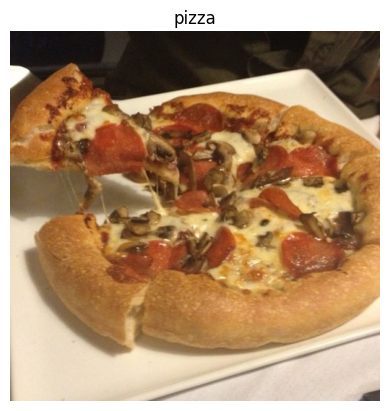

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  random_image=random_image[0]
  # Read in the image and plot it using matplotlib
  img_path = target_folder+"/"+random_image
  print("path of the image is:",img_path)
  img = mpimg.imread(img_path) # from link we can extract the image is numpy array format by mpimg.imread
  # print(img)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image("./pizza_steak/train/" ,"pizza")


path of the image is: ./pizza_steak/train/steak/2928643.jpg
Image shape: (289, 512, 3)


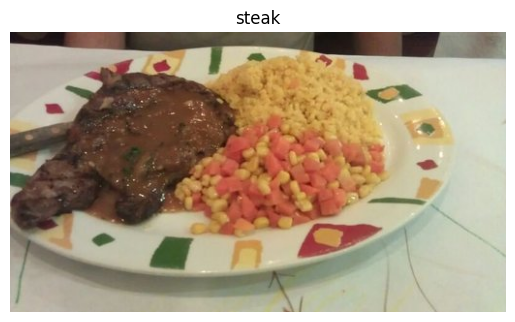

In [19]:
img = view_random_image("./pizza_steak/train/" ,"steak")

(512, 512, 3)


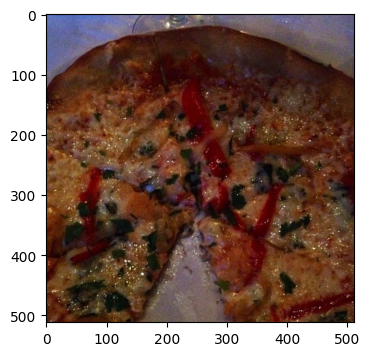

In [20]:
# one image is
path_ = "./pizza_steak/train/pizza"

# .imshow expects an array numpy so we need to convertthis image into a numpy that we will also use it in CNN model
one_img =os.listdir(path_)[0]
# print(one_img)
img_path = os.path.join(path_ ,one_img)
# to covert image into array
img = mpimg.imread(img_path)
plt.figure(figsize=(4, 4))
plt.imshow(img)
print(img.shape)


## TYPICAL CNN

1. Input Image
2. Input layer
3. Convolution layer
4. Hidden activation
5. Pooling layer
6. Fully Connected layer
7. Output layer
8. Output activation

## CREATING MODEL



### How flow_from_directory Works in Training:


1. It first scans the train_dir directory and identifies subdirectories. Each subdirectory corresponds to a class (e.g., pizza, steak)
`{'pizza': 0, 'steak': 1}`
2. The generator loops through all the images in the directory, ensuring each image is seen exactly once per epoch.
3. Batch Creation-For each batch (e.g., of size 32),
  1. Loads and preprocesses 32 images.
  2. Rescales the pixel values (if rescale=1./255 is specified).
  3. Converts the images into the specified shape (e.g., (224, 224)).
  4. Associates each image with its corresponding class label (e.g., 0 for pizza, 1 for steak).
  5. Augmentation is done -** Augmentation is done on the fly , if we want to ,the number of dataset in the folder does not changes.**

4. Continuous Process:
  1. This process continues until all images are used once in an epoch.
For the next epoch, the process repeats (with shuffling if enabled)
   



For example if there are 1000 datapoints in train (consisting of all the labels) and the batch_size that we choose is 10 , then for a single epoch 100 batches of data will be given to the training . and then the next epoch happens







In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
tf.random.set_seed(42)

# creating the ImageDataGenerator objects for training anf validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255            # Normalize pixel values to be between 0 and 1
   # rotation_range=30,          # Randomly rotate images by up to 30 degrees
   # width_shift_range=0.2,      # Randomly shift images horizontally by up to 20%
   # height_shift_range=0.2,     # Randomly shift images vertically by up to 20%
   # shear_range=0.2,            # Randomly shear images by up to 20%
   # zoom_range=0.2,             # Randomly zoom in/out by up to 20%
   # horizontal_flip=True,       # Randomly flip images horizontally
   # fill_mode="nearest"         # Fill missing pixels after transformation
)


valid_datagen = ImageDataGenerator(
    rescale=1./255
)


# Imprting data from directory and turn it into batches

train_directory="pizza_steak/train/"
test_directory="pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary", # since only two labels(binary classfication)
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
print(train_data.samples)

1500


In [27]:
print(train_data.num_classes)

2


## One batch

In [28]:
images, labels = next(train_data)
print(images.shape)
print(labels.shape)
print(labels)

(32, 224, 224, 3)
(32,)
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]


key steps of above
1. ImageDataGenerator Setup:
  1. Training (train_datagen): Rescales images (and can apply augmentations like rotation or shift).
  2. Validation (valid_datagen): Only rescales images (no augmentations).
2. Data Loading:

  1. train_datagen.flow_from_directory(train_directory) loads training images, resizes them to 224x224 pixels, normalizes, and batches them.
Similarly, valid_datagen.flow_from_directory(test_directory) does the same for validation data.

3. Batching:

  1. Each batch contains 32 images (as specified by batch_size=32) and their corresponding labels (0 for pizza, 1 for steak)

In [30]:

model_1= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # or (number of kernels)
                           kernel_size=3,   # can also be (3, 3)
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"), # padding can also be 'same' (means do padding to ensure smae size of image)
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2), # default value of padding is valid( that is size decreases after this layer)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")


])

Number of batches??

In [31]:
print(len(train_data))


47


why 47???

beacuse we have 1500 images in training and batch_size is 32
so 1500/32 = 46.875 =47 batches

In [32]:
# step2. Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# step3. Fit the model
steps_per_epoch_training = len(train_data) // 32
steps_per_epoch_validation = len(valid_data) // 32


history_1 = model_1.fit(
    train_data,
    epochs=5,
    validation_data=valid_data
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6466 - loss: 0.6252 - val_accuracy: 0.7620 - val_loss: 0.4846
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7926 - loss: 0.4696 - val_accuracy: 0.8100 - val_loss: 0.4229
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8022 - loss: 0.4278 - val_accuracy: 0.8040 - val_loss: 0.4121
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8275 - loss: 0.4034 - val_accuracy: 0.8440 - val_loss: 0.3559
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8298 - loss: 0.3815 - val_accuracy: 0.8300 - val_loss: 0.3698


In [33]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

using neural network model and comparing

In [34]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.5032 - loss: 2.7128 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.5035 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.5024 - loss: 0.6916 - val_accuracy: 0.5240 - val_loss: 0.7001
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.4807 - loss: 0.6898 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.4929 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [35]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [36]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 422ms/step - accuracy: 0.5785 - loss: 10.7723 - val_accuracy: 0.7660 - val_loss: 1.0374
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 398ms/step - accuracy: 0.7446 - loss: 1.4973 - val_accuracy: 0.7360 - val_loss: 0.9732
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 374ms/step - accuracy: 0.7711 - loss: 0.8896 - val_accuracy: 0.7040 - val_loss: 1.1032
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 379ms/step - accuracy: 0.7177 - loss: 0.9122 - val_accuracy: 0.6760 - val_loss: 0.8817
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.7586 - loss: 0.5507 - val_accuracy: 0.7700 - val_loss: 0.5403


In [37]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,189,305 (172.38 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,126,204 (114.92 MB)

# Binary classification: Let's break it down
We just went through a whirlwind of steps:

Become one with the data (visualize, visualize, visualize...)

Preprocess the data (prepare it for a model)

Create a model (start with a baseline)
Fit the model

Evaluate the model

Adjust different parameters and improve model (try to beat your baseline)

Repeat until satisfied

Let's step through each.

## 1. Visualize the data

path of the image is: pizza_steak/train/steak/285045.jpg
Image shape: (512, 382, 3)
path of the image is: pizza_steak/train/pizza/307677.jpg
Image shape: (341, 512, 3)


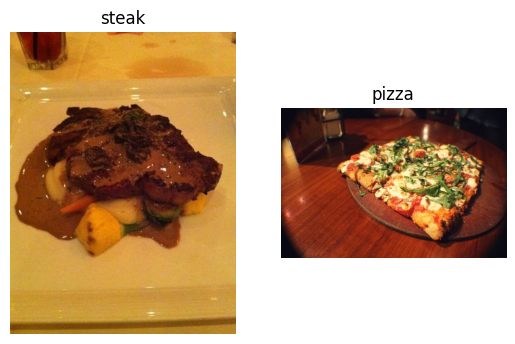

In [38]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess (Prepare it for model)

In [39]:
train_dir ="pizza_steak/train/"
test_dir ="pizza_steak/test/"


To turn our data into batches or augment , we'll first create an instance of ImageDataGenerator for each of our datasets.

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1/255.
)
test_datagen = ImageDataGenerator(
    rescale=1/255.
)

we can also do data augmentation using this ImageDataGenerators

In [42]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32, # number of images in one batch
    class_mode="binary" #categorical if more than 2 calss
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [43]:
import matplotlib.pyplot as plt

Number of images in a batch 32
32
----------------
(32, 224, 224, 3)
0.0


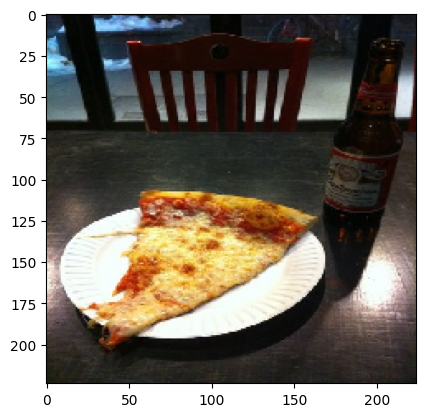

In [46]:
images, labels = next(train_data) # get the 'next' batch of images/labels
print("Number of images in a batch",len(images))
print(len(labels))
print("----------------")

print(images.shape)

plt.imshow(images[0])
print(labels[0])

so what we know is that ,
this ImageDataGenerator createad a batch size of 32 ,that is 32 images in a batch with size mentioned
and corresponding to each image a label is marked ,here 0 for pizza and 1 for stake


Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

In [47]:
print(labels)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1.]


# 3. Create a model (start with a baseline)

It's good to build a smaller model to acquire a baseline result which you try to improve upon.

### INPUT-> (CONV+RELU) ->POOLING LAYER -> FCNN(DENSE LAYERS) as output

In [48]:

model_4= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10 ,3 ,activation="relu" ,strides=1 ,input_shape=(224 ,224 ,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(), # we flatten the image eg (7,7,10) to 1D 490 and then pass to NN to predict the target
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [49]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [50]:
history_4=model_4.fit(train_data,
                    epochs=5,
                    validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.5927 - loss: 0.6889 - val_accuracy: 0.7440 - val_loss: 0.5231
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7960 - loss: 0.4435 - val_accuracy: 0.8280 - val_loss: 0.4108
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9198 - loss: 0.2399 - val_accuracy: 0.7060 - val_loss: 0.5517
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9477 - loss: 0.1716 - val_accuracy: 0.7860 - val_loss: 0.5279
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9829 - loss: 0.0737 - val_accuracy: 0.7940 - val_loss: 0.5357


#5. Evaluating the model

<Axes: >

<Figure size 1000x700 with 0 Axes>

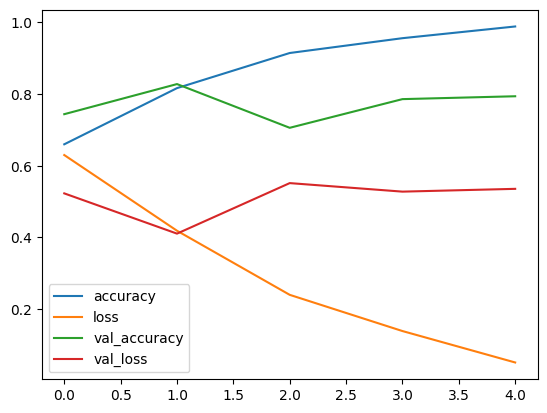

In [52]:
import pandas as pd
plt.figure(figsize=(10,7))
pd.DataFrame(history_4.history).plot()

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [53]:
## Creatiing seprate function for acciracy and loss


def plot_loss_curves(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]

  val_loss=history.history["val_loss"]
  val_accuracy =history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()




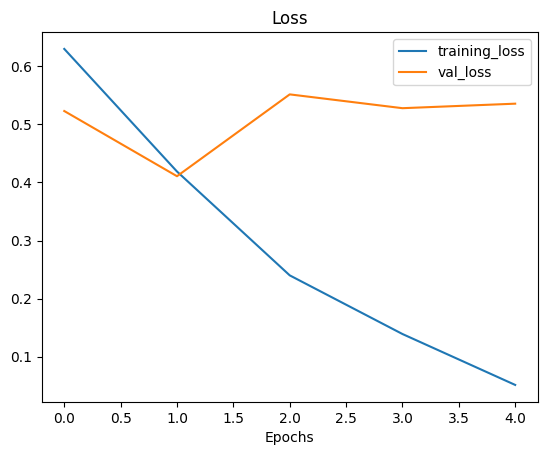

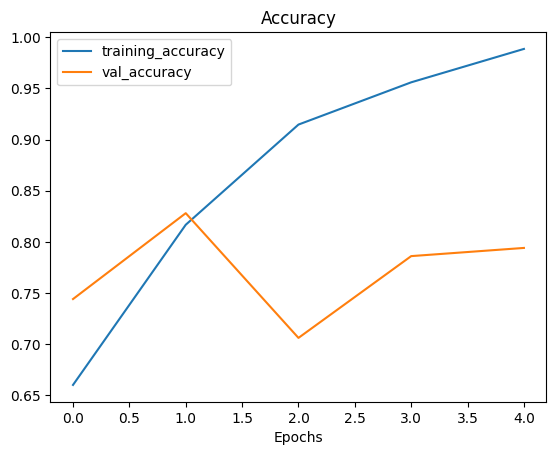

In [54]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting

In [55]:
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

## 6 .Adjusting the model params

To further over fit our model we can
1. Increase the number of conv2D layers
2. Increase the number of Conc filters
3, Add more dense layers after flattening the layer

we will do 2 experiment for reduncing overfitiing that we got above

1. A ConvNet with max pooling
2. A ConvNet with max pooling and data augmentation

1.Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

In [56]:
model_5= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10 ,3 ,activation="relu" ,strides=1 ,input_shape=(224 ,224 ,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(), # we flatten the image eg (7,7,10) to 1D 490 and then pass to NN to predict the target
    tf.keras.layers.Dense(1,activation="sigmoid")

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Max pool extracts tghe most important feature of the image

In [57]:

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5869 - loss: 0.6678 - val_accuracy: 0.7620 - val_loss: 0.4965
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7702 - loss: 0.4922 - val_accuracy: 0.8380 - val_loss: 0.3882
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7918 - loss: 0.4487 - val_accuracy: 0.8540 - val_loss: 0.3592
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8224 - loss: 0.3921 - val_accuracy: 0.8400 - val_loss: 0.3483
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8237 - loss: 0.3985 - val_accuracy: 0.8540 - val_loss: 0.3423


In [79]:
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

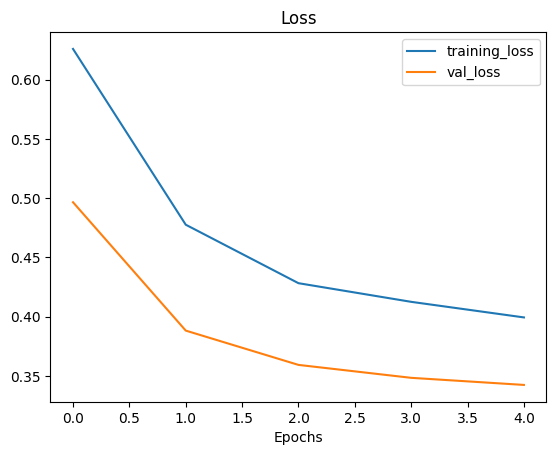

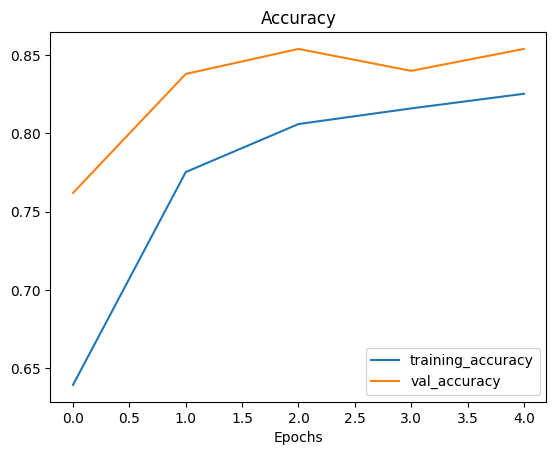

In [59]:
plot_loss_curves(history_5)

We can see that training curves get to a lot closer to each other .

However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

## Method 2 of overfitting prevention
# Data Augmentation

In [80]:

# Creating ImageDataGenerator with data augmentation
train_datagen_augmented =ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
)



In data augmentation ,the image is slighlty rotated or shifts or shear and then passed to model ,
this allows our model to learn generalizable patterns .

The augmentation for an image is created ontime ,thtat is our image is not increased int he data ,but trained on more number of data

In [81]:
#
print("Augmented training image")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(
    train_dir ,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

print("unchanged test images")

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)




Augmented training image
Found 1500 images belonging to 2 classes.
unchanged test images
Found 500 images belonging to 2 classes.


In [82]:
import numpy as np

(32, 224, 224, 3)
1.0


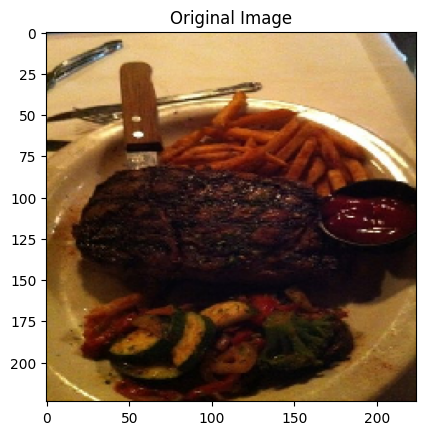

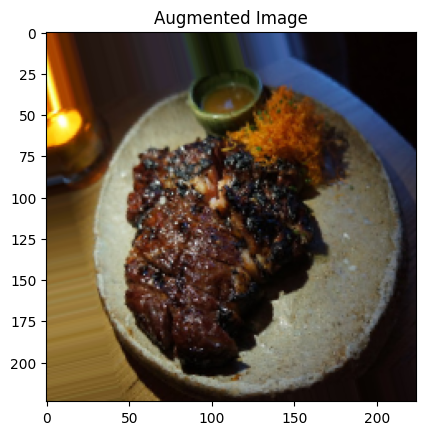

In [83]:
# visulaising augmented data and non augemented data
# train_data
images, labels = next(train_data)

print(images.shape) #32 images in one batch
random_ind= np.random.randint(0,31)
plt.imshow(images[random_ind])
print(labels[random_ind])
plt.title("Original Image")
plt.show()


plt.title("Augmented Image")
plt.imshow(train_datagen_augmented[0][0][random_ind])
plt.show()


##Now lets try to fit model on augmented data set

In [90]:
model_6 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10 ,3 ,activation="relu" ,strides=1 ,input_shape=(224 ,224,3)),
    tf.keras.layers.Conv2D(10 ,3 ,activation="relu" ,strides=1 ,input_shape=(224 ,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(), # we flatten the image eg (7,7,10) to 1D 490 and then pass to NN to predict the target
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_datagen_augmented,
                        epochs=5,
                        validation_data=test_data)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.6285 - loss: 0.6262 - val_accuracy: 0.8080 - val_loss: 0.4287
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7329 - loss: 0.5416 - val_accuracy: 0.7920 - val_loss: 0.4352
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7663 - loss: 0.4905 - val_accuracy: 0.8220 - val_loss: 0.3753
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.7966 - loss: 0.4727 - val_accuracy: 0.8600 - val_loss: 0.3462
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8328 - loss: 0.4155 - val_accuracy: 0.8540 - val_loss: 0.3290


note that model_1 and model_8 architectures are same

In [92]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [93]:
model_6.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 112360)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │         112,361 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,115 (1.32 MB)

 Trainable params: 115,371 (450.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,744 (901.35 KB)

#7. Repear Until Satisfied

what can do you?
1. Increase the number of model layers
2. Increase the number of filters
3.Train for longer
4. Finding an ideal learning rate
5. Get more data
6. Use transfer Learning to leverage what another image model is learned and adjust it for our own use case.

# Making predictiond with our trained model

The number of classes

In [91]:
print(class_names)

['pizza' 'steak']


In [94]:
# prediction on 1st image

In [98]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

# steak =mpimg.imread("03-steak-jpeg")
# plt.imshow(steak)
# plt.axis(False)

--2024-12-17 15:27:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2024-12-17 15:27:47 (19.8 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

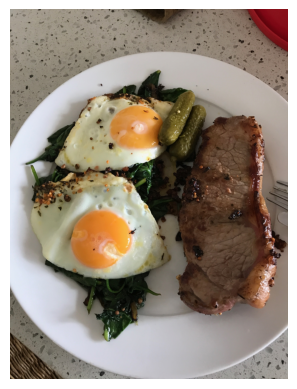

In [102]:
steak =mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)
# !ls
# /content/03-steak.jpeg

In [103]:
steak.shape

(4032, 3024, 3)

In [ ]:
# reshape to what  our model needs and scaling it also

In [104]:
def load_and_prep_image(filename, img_shape=224):

  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [105]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [106]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
# we need it in the form of  (1 ,(image properties))


In [107]:
steak = tf.expand_dims(steak, axis=0)

In [108]:
steak.shape

TensorShape([1, 224, 224, 3])

In [110]:
pred =model_6.predict(steak)

pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[0.70657957]], dtype=float32)

Writing a function to convert predictions to their class name

In [111]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [114]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


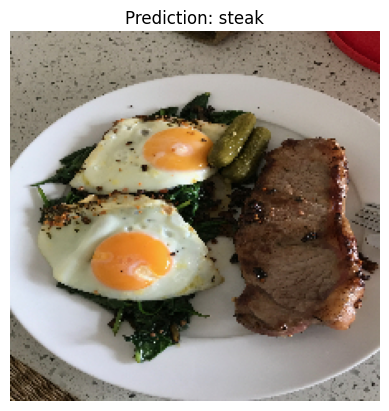

In [115]:
pred_and_plot(model_6 ,"/content/03-steak.jpeg",class_names)

2nd image

--2024-12-17 15:38:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2024-12-17 15:38:29 (26.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


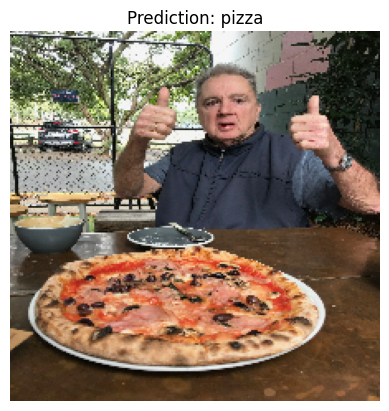

In [117]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, "03-pizza-dad.jpeg", class_names)